In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [3]:
# 파일 가져오기

file_name = 'C:/Users/abc99/OneDrive/바탕 화면/2023 2학기 파일 전체 모음/딥러닝응용/raisin/Raisin_Dataset.xlsx'
df = pd.read_excel(file_name)
print(df)

      Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524       442.246011       253.291155      0.819738       90546   
1    75166       406.690687       243.032436      0.801805       78789   
2    90856       442.267048       266.328318      0.798354       93717   
3    45928       286.540559       208.760042      0.684989       47336   
4    79408       352.190770       290.827533      0.564011       81463   
..     ...              ...              ...           ...         ...   
895  83248       430.077308       247.838695      0.817263       85839   
896  87350       440.735698       259.293149      0.808629       90899   
897  99657       431.706981       298.837323      0.721684      106264   
898  93523       476.344094       254.176054      0.845739       97653   
899  85609       512.081774       215.271976      0.907345       89197   

       Extent  Perimeter    Class  
0    0.758651   1184.040  Kecimen  
1    0.684130   1121.786  Kecimen  
2  

In [4]:
data = df

In [5]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [6]:
# data null값 측정하기

data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [12]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [15]:
dataX = data[['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']]
dataX = MinMaxScaler(data)
dataY = dataX[['Class']]

In [16]:
dataX

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,0.612903,0.615128,0.556174,0.620690,0.605587,0.902113,0.605117,1.0
1,0.449388,0.496107,0.454950,0.521691,0.461453,0.332592,0.503893,1.0
2,0.648498,0.616240,0.646274,0.498331,0.637989,0.113459,0.637375,1.0
3,0.082314,0.060067,0.176863,0.120133,0.075978,0.438265,0.073415,1.0
4,0.513904,0.282536,0.788654,0.036707,0.497207,0.989989,0.424917,1.0
...,...,...,...,...,...,...,...,...
895,0.560623,0.569522,0.499444,0.602892,0.549721,0.239155,0.512792,0.0
896,0.610679,0.607341,0.600667,0.565072,0.613408,0.110122,0.641824,0.0
897,0.711902,0.575083,0.822024,0.193548,0.726257,0.803115,0.729700,0.0
898,0.667408,0.704116,0.562848,0.759733,0.670391,0.196885,0.691880,0.0


In [17]:
dataY

,Class
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
895,0.0
896,0.0
897,0.0
898,0.0


In [22]:
# 두 데이터를 리스트 형태로 저장
X = dataX.drop(columns=['Class'], axis=1).values
y = dataY.values

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [24]:
# n_features : represents the number of features you want to have for each time step
n_features = 1

# Make X to 3D format
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [25]:
X.shape

(900, 7, 1)

In [26]:
import numpy as np

# Make Y suitable for X.shape
Y = np.argmax(Y, axis=1).reshape(-1, 1)

In [27]:
Y.shape

(900, 1)

In [28]:
# X.shape[0] = rows, X.shape[1] = columns(In code, it's features)
n_steps = X.shape[1]
n_steps

7

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [30]:
# Make Model
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(n_steps,n_features)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 20)             1760      
                                                                 
 dropout (Dropout)           (None, 7, 20)             0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [38]:
N_EPOCHS = 70
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
24/24 [==============================] - 5s 11ms/step - loss: 0.2500
Epoch 2/70
24/24 [==============================] - 0s 11ms/step - loss: 0.2500
Epoch 3/70
24/24 [==============================] - 0s 14ms/step - loss: 0.2500
Epoch 4/70
24/24 [==============================] - 0s 18ms/step - loss: 0.2500
Epoch 5/70
24/24 [==============================] - 0s 18ms/step - loss: 0.2500
Epoch 6/70
24/24 [==============================] - 0s 17ms/step - loss: 0.2500
Epoch 7/70
24/24 [==============================] - 0s 17ms/step - loss: 0.2500
Epoch 8/70
24/24 [==============================] - 0s 17ms/step - loss: 0.2500
Epoch 9/70
24/24 [==============================] - 0s 17ms/step - loss: 0.2500
Epoch 10/70
24/24 [==============================] - 0s 17ms/step - loss: 0.2500
Epoch 11/70
24/24 [==============================] - 0s 17ms/step - loss: 0.2500
Epoch 12/70
24/24 [==============================] - 0s 17ms/step - loss: 0.2500
Epoch 13/70
24/24 [==================

NameError: name 'test_X' is not defined

In [39]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 1s 8ms/step - loss: 0.2500


0.25

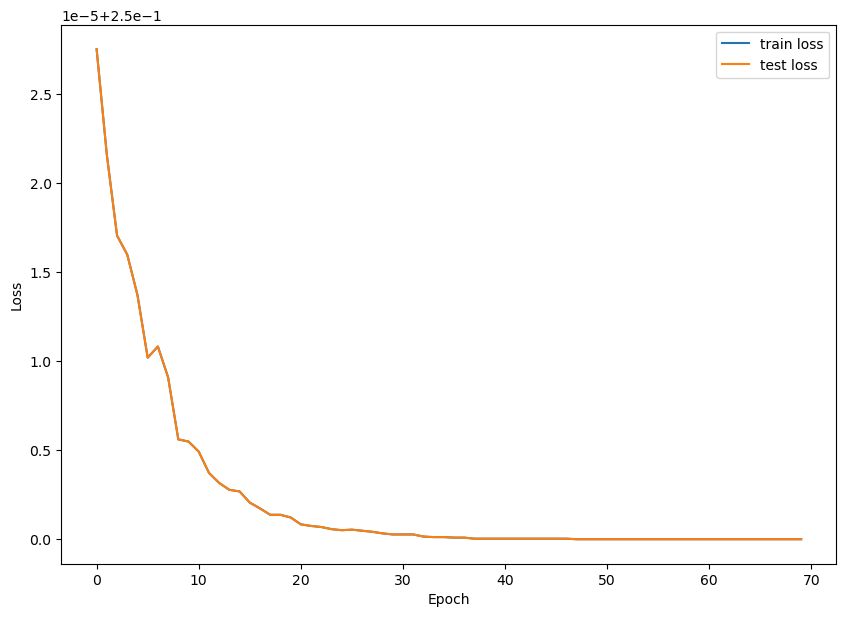

In [40]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()